In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
import sqlite3

In [7]:
con = sqlite3.connect(r'/Users/karishmagupta/Downloads/database.sqlite')

In [8]:
type(con)

sqlite3.Connection

In [9]:
df= pd.read_sql_query("SELECT * FROM REVIEWS", con)

In [14]:
df.shape

(568454, 10)

In [11]:
df.head(4)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...


In [18]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [26]:
df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']  #invalid

0         False
1         False
2         False
3         False
4         False
          ...  
568449    False
568450    False
568451    False
568452    False
568453    False
Length: 568454, dtype: bool

In [28]:
df[df['HelpfulnessNumerator'] > df['HelpfulnessDenominator']]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
44736,44737,B001EQ55RW,A2V0I904FH7ABY,Ram,3,2,4,1212883200,Pure cocoa taste with crunchy almonds inside,It was almost a 'love at first bite' - the per...
64421,64422,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",3,1,5,1224892800,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...


In [13]:
df_valid = df[df['HelpfulnessNumerator'] < df['HelpfulnessDenominator']]

In [15]:
df_valid

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
14,15,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4,5,5,1268352000,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...
15,16,B001GVISJM,A1CZX3CP8IKQIJ,Brian A. Lee,4,5,5,1262044800,"Lots of twizzlers, just what you expect.",My daughter loves twizzlers and this shipment ...
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan..."
27,28,B001GVISJM,AAAS38B98HMIK,Heather Dube,0,1,4,1331856000,Great Bargain for the Price,I was so glad Amazon carried these batteries. ...
31,32,B003F6UO7K,A31OQO709M20Y7,"Molly V. Smith ""staral""",0,1,5,1288310400,THIS IS MY TASTE...,"This offer is a great price and a great taste,..."
...,...,...,...,...,...,...,...,...,...,...
568405,568406,B000P56I7Y,A2ZKNGL20FBK2I,Shatzi Crabtree,3,5,5,1274918400,Arrived Fine,The product arrived pretty quickly and was eas...
568413,568414,B0018CLWM4,AI3Y26HLPYW4L,kimosabe,1,2,2,1330041600,premium edge cat food,My cats don't like it. what else can I say to ...
568417,568418,B0000D16IP,A1SOL9F0I9D3A4,William M. Jacobs,2,4,4,1257897600,Great,This is the best brand of Mango Chutney that I...
568435,568436,B003XUL27E,A2PSB4WQHH46HN,carlyowu,0,2,2,1285718400,Where's the tortellini?,"It is mostly broth, with the advertised 3/4 cu..."


In [38]:
df_valid.duplicated(['UserId','ProfileName','Time','Text'])

14        False
15        False
26        False
27        False
31        False
          ...  
568405    False
568413     True
568417    False
568435    False
568439    False
Length: 115091, dtype: bool

In [17]:
data= df_valid.drop_duplicates(subset=['UserId','ProfileName','Time','Text'])

In [42]:
data.shape

(78220, 10)

In [46]:
data.dtypes #time stored in date time

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [50]:
data['Time']

14        1268352000
15        1262044800
26        1332633600
27        1331856000
31        1288310400
             ...    
568384    1255219200
568405    1274918400
568417    1257897600
568435    1285718400
568439    1280102400
Name: Time, Length: 78220, dtype: int64

In [52]:
pd.to_datetime(data['Time'])

14       1970-01-01 00:00:01.268352000
15       1970-01-01 00:00:01.262044800
26       1970-01-01 00:00:01.332633600
27       1970-01-01 00:00:01.331856000
31       1970-01-01 00:00:01.288310400
                      ...             
568384   1970-01-01 00:00:01.255219200
568405   1970-01-01 00:00:01.274918400
568417   1970-01-01 00:00:01.257897600
568435   1970-01-01 00:00:01.285718400
568439   1970-01-01 00:00:01.280102400
Name: Time, Length: 78220, dtype: datetime64[ns]

In [19]:
pd.to_datetime(data['Time'], unit='s')

14       2010-03-12
15       2009-12-29
26       2012-03-25
27       2012-03-16
31       2010-10-29
            ...    
568384   2009-10-11
568405   2010-05-27
568417   2009-11-11
568435   2010-09-29
568439   2010-07-26
Name: Time, Length: 78220, dtype: datetime64[ns]

In [21]:
data['Time'] =pd.to_datetime(data['Time'], unit='s')

/var/folders/l2/jhd87z2n59ngd0gm_hwq2dxr0000gn/T/ipykernel_1332/465285813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time'] =pd.to_datetime(data['Time'], unit='s')


In [23]:
import warnings 
from warnings import filterwarnings
filterwarnings('ignore')

Analyse to what user amazon can recommend more product? -- buy more or conversion rate

In [25]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [80]:
data['UserId']

14        A2MUGFV2TDQ47K
15        A1CZX3CP8IKQIJ
26        A3RXAU2N8KV45G
27         AAAS38B98HMIK
31        A31OQO709M20Y7
               ...      
568384     A8T6W1M15FM75
568405    A2ZKNGL20FBK2I
568417    A1SOL9F0I9D3A4
568435    A2PSB4WQHH46HN
568439    A34GDV49ZZQKXG
Name: UserId, Length: 78220, dtype: object

In [82]:
data['UserId'].unique()

array(['A2MUGFV2TDQ47K', 'A1CZX3CP8IKQIJ', 'A3RXAU2N8KV45G', ...,
       'A1SOL9F0I9D3A4', 'A2PSB4WQHH46HN', 'A34GDV49ZZQKXG'], dtype=object)

In [84]:
data['UserId'].nunique() 

62052

In [27]:
recommend_df=data.groupby(['UserId']).agg({'Summary': 'count','Text':'count','Score':'mean','ProductId':'count'}).sort_values(by='ProductId', ascending = False)

In [29]:
recommend_df

,Summary,Text,Score,ProductId
UserId,,,,
A281NPSIMI1C2R,70,70,4.800000,70
A2A1XYSB692L6J,53,53,3.698113,53
A1LZJZIHUPLDV4,51,51,4.960784,51
A29313797NGT9L,45,45,3.311111,45
A1YUL9PCJR3JTY,44,44,4.590909,44
...,...,...,...,...
A2BUMO4IARNSL,1,1,1.000000,1
A2BUPVAQ8NN7EU,1,1,5.000000,1
A2BUR03REASIKQ,1,1,1.000000,1


In [31]:
recommend_df.columns = ['no_of_summaries','num_text','avg_score','no_of_products_purchased']

In [33]:
recommend_df

,no_of_summaries,num_text,avg_score,no_of_products_purchased
UserId,,,,
A281NPSIMI1C2R,70,70,4.800000,70
A2A1XYSB692L6J,53,53,3.698113,53
A1LZJZIHUPLDV4,51,51,4.960784,51
A29313797NGT9L,45,45,3.311111,45
A1YUL9PCJR3JTY,44,44,4.590909,44
...,...,...,...,...
A2BUMO4IARNSL,1,1,1.000000,1
A2BUPVAQ8NN7EU,1,1,5.000000,1
A2BUR03REASIKQ,1,1,1.000000,1


In [106]:
recommend_df.index

Index(['A281NPSIMI1C2R', 'A2A1XYSB692L6J', 'A1LZJZIHUPLDV4', 'A29313797NGT9L',
       'A1YUL9PCJR3JTY', 'A2R6RA8FRBS608', 'A3D6TFYRMIV3ZL', 'A3F3B1JPACN215',
       'AXO4PQU0XG3TG', 'A1WX42M589VAMQ',
       ...
       'A2BUFIZ3APL7Q7', 'A2BUGR79KV22IT', 'A2BUHVJ2G2GRV1', 'A2BUI0SNHRC8WA',
       'A2BUIT9Y3HXF3B', 'A2BUMO4IARNSL', 'A2BUPVAQ8NN7EU', 'A2BUR03REASIKQ',
       'A2BUR0K3PIUMGW', 'AZZTH6DJ0KSIP'],
      dtype='object', name='UserId', length=62052)

In [108]:
recommend_df.index[0:10]

Index(['A281NPSIMI1C2R', 'A2A1XYSB692L6J', 'A1LZJZIHUPLDV4', 'A29313797NGT9L',
       'A1YUL9PCJR3JTY', 'A2R6RA8FRBS608', 'A3D6TFYRMIV3ZL', 'A3F3B1JPACN215',
       'AXO4PQU0XG3TG', 'A1WX42M589VAMQ'],
      dtype='object', name='UserId')

In [110]:
recommend_df['no_of_products_purchased'][0:10]

UserId
A281NPSIMI1C2R    70
A2A1XYSB692L6J    53
A1LZJZIHUPLDV4    51
A29313797NGT9L    45
A1YUL9PCJR3JTY    44
A2R6RA8FRBS608    43
A3D6TFYRMIV3ZL    39
A3F3B1JPACN215    38
AXO4PQU0XG3TG     37
A1WX42M589VAMQ    31
Name: no_of_products_purchased, dtype: int64

In [112]:
recommend_df['no_of_products_purchased'][0:10].values

array([70, 53, 51, 45, 44, 43, 39, 38, 37, 31])

<BarContainer object of 10 artists>

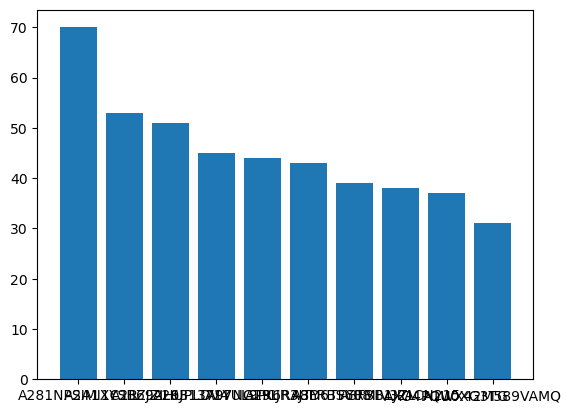

In [114]:
plt.bar(recommend_df.index[0:10],recommend_df['no_of_products_purchased'][0:10].values)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'A281NPSIMI1C2R'),
  Text(1, 0, 'A2A1XYSB692L6J'),
  Text(2, 0, 'A1LZJZIHUPLDV4'),
  Text(3, 0, 'A29313797NGT9L'),
  Text(4, 0, 'A1YUL9PCJR3JTY'),
  Text(5, 0, 'A2R6RA8FRBS608'),
  Text(6, 0, 'A3D6TFYRMIV3ZL'),
  Text(7, 0, 'A3F3B1JPACN215'),
  Text(8, 0, 'AXO4PQU0XG3TG'),
  Text(9, 0, 'A1WX42M589VAMQ')])

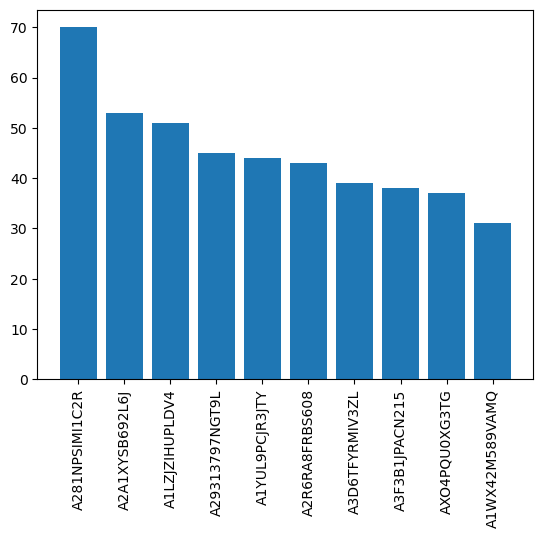

In [118]:
plt.bar(recommend_df.index[0:10],recommend_df['no_of_products_purchased'][0:10].values)
plt.xticks(rotation='vertical')

Which products has good no of reviews?

In [35]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [126]:
data['ProductId'].unique()

array(['B001GVISJM', 'B003F6UO7K', 'B001EO5QW8', ..., 'B0000D16IP',
       'B003XUL27E', 'B000NY4SAG'], dtype=object)

In [128]:
data['ProductId'].nunique()

22602

In [37]:
prod_count=data['ProductId'].value_counts().to_frame()

In [39]:
prod_count

,count
ProductId,
B002IEZJMA,240
B007I7Z3Z0,229
B006Q820X0,203
B005ZBZLT4,200
B004JRMG98,191
...,...
B000M8O0ME,1
B001ASH39W,1
B000IXWDKE,1


In [162]:
prod_count['count']>150 # about 150 - products more sales

ProductId
B002IEZJMA     True
B007I7Z3Z0     True
B006Q820X0     True
B005ZBZLT4     True
B004JRMG98     True
              ...  
B000M8O0ME    False
B001ASH39W    False
B000IXWDKE    False
B0028H3IE8    False
B000NY4SAG    False
Name: count, Length: 22602, dtype: bool

In [158]:
prod_count[prod_count['count']>150] 

,count
ProductId,
B002IEZJMA,240
B007I7Z3Z0,229
B006Q820X0,203
B005ZBZLT4,200
B004JRMG98,191
B006MONQMC,191
B0045XE32E,177
B005VOONKI,167
B0041NYV8E,164


In [41]:
freq_prod=prod_count[prod_count['count']>150].index

In [43]:
freq_prod

Index(['B002IEZJMA', 'B007I7Z3Z0', 'B006Q820X0', 'B005ZBZLT4', 'B004JRMG98',
       'B006MONQMC', 'B0045XE32E', 'B005VOONKI', 'B0041NYV8E', 'B005K4Q37A',
       'B001LG940E', 'B000LQORDE', 'B001VJ0B0I', 'B0090X8IPM'],
      dtype='object', name='ProductId')

In [45]:
data['ProductId'].isin(freq_prod)

14        False
15        False
26        False
27        False
31        False
          ...  
568384    False
568405    False
568417    False
568435    False
568439    False
Name: ProductId, Length: 78220, dtype: bool

In [47]:
freq_prod = data[data['ProductId'].isin(freq_prod)]

In [49]:
freq_prod

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
14023,14024,B0045XE32E,A3NYTSAEPZDJ7Y,Elizabeth Ray,5,8,2,2011-03-14,He ate them begrudgingly,I was excited to offer these seemingly healthy...
14024,14025,B0045XE32E,A2IMLOJ2Z2QEU2,Naomi (Storm),5,8,5,2011-02-28,My dogs love these,"I have two dogs, an Alaskan Malamute and a Shi..."
14025,14026,B0045XE32E,A1LAGS8H4A2DR7,Bill Nicholas,3,5,3,2011-03-14,"I know the Features, but not the Benefits",It's hard to review something a dog eats. Our ...
14026,14027,B0045XE32E,A38H4XCCPLRF93,L. Maynard,3,5,4,2011-02-22,Not for small breed dogs,I got these for my two chihuahuas and a welsh ...
14027,14028,B0045XE32E,A3UC3YT2E65LZO,R. Dowling,1,2,5,2011-03-28,"Chow/golden retriever gives these ""two paws up!""",I ordered these for a friend who has a chow/go...
...,...,...,...,...,...,...,...,...,...,...
543909,543910,B006MONQMC,AY46DEOJJYFTW,Kerry O. Burns,0,3,1,2012-04-05,"nice idea, bad taste...",It must have sounded like a winner on the draw...
543910,543911,B006MONQMC,A1UMSB7LAW0RIR,"Writer of Books - Mage - Mom to Two ""Writer, ...",0,3,1,2012-03-31,Just a mess all the way around.,I love energy drinks. This one is kind of a me...
543911,543912,B006MONQMC,A305XM71TF83CY,Keleigh Crigler Hadley,0,3,1,2012-03-30,Too confusing,"""A squeeze""? How do I know how much I should s..."
543912,543913,B006MONQMC,A3T4OHEAHOJ700,B. Colonna,0,3,1,2012-03-30,More Like Vitamin Squeeze Enemy,I had read a few of the reviews on Vitamin Squ...


<Axes: xlabel='count', ylabel='ProductId'>

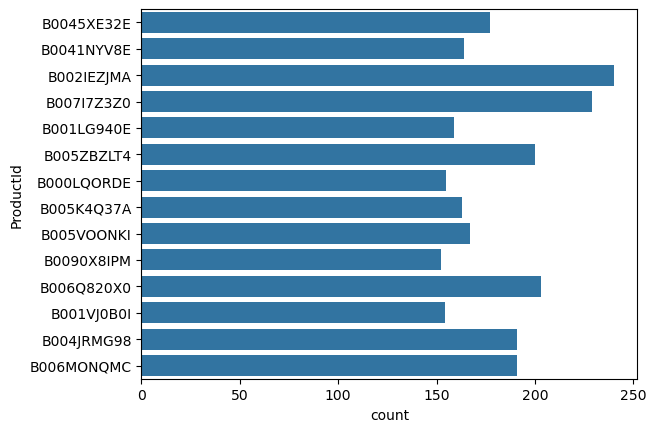

In [61]:
sns.countplot(y = 'ProductId' , data=freq_prod)

<Axes: xlabel='count', ylabel='ProductId'>

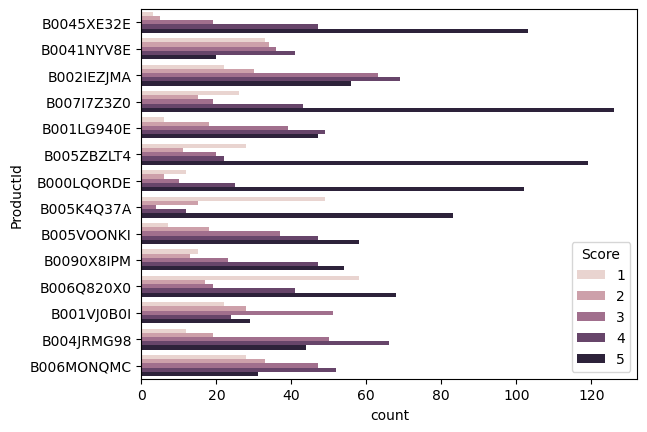

In [63]:
sns.countplot(y = 'ProductId' , data=freq_prod , hue='Score')

Is there any difference b/w behaviour of frequent viewers & not frequent viewers?

In [66]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [70]:
x= data['UserId'].value_counts()

In [72]:
x

UserId
A281NPSIMI1C2R    70
A2A1XYSB692L6J    53
A1LZJZIHUPLDV4    51
A29313797NGT9L    45
A1YUL9PCJR3JTY    44
                  ..
AIKK0O36ZIWM0      1
A2WN4WXBH2B8AN     1
AVUF9YJWWNDHL      1
A12B2H42QXCG3G     1
A34GDV49ZZQKXG     1
Name: count, Length: 62052, dtype: int64

In [76]:
data['Viewer_type']=data['UserId'].apply(lambda user: "Frequent" if x[user]>40 else "Not Frequent")

In [78]:
data.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Viewer_type
14,15,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4,5,5,2010-03-12,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...,Not Frequent
15,16,B001GVISJM,A1CZX3CP8IKQIJ,Brian A. Lee,4,5,5,2009-12-29,"Lots of twizzlers, just what you expect.",My daughter loves twizzlers and this shipment ...,Not Frequent
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,2012-03-25,Nasty No flavor,"The candy is just red , No flavor . Just plan...",Not Frequent


In [80]:
data['Viewer_type']=='Not Frequent'

14        True
15        True
26        True
27        True
31        True
          ... 
568384    True
568405    True
568417    True
568435    True
568439    True
Name: Viewer_type, Length: 78220, dtype: bool

In [82]:
Not_freq_viewer = data[data['Viewer_type']=='Not Frequent']

In [84]:
Not_freq_viewer

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Viewer_type
14,15,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4,5,5,2010-03-12,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...,Not Frequent
15,16,B001GVISJM,A1CZX3CP8IKQIJ,Brian A. Lee,4,5,5,2009-12-29,"Lots of twizzlers, just what you expect.",My daughter loves twizzlers and this shipment ...,Not Frequent
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,2012-03-25,Nasty No flavor,"The candy is just red , No flavor . Just plan...",Not Frequent
27,28,B001GVISJM,AAAS38B98HMIK,Heather Dube,0,1,4,2012-03-16,Great Bargain for the Price,I was so glad Amazon carried these batteries. ...,Not Frequent
31,32,B003F6UO7K,A31OQO709M20Y7,"Molly V. Smith ""staral""",0,1,5,2010-10-29,THIS IS MY TASTE...,"This offer is a great price and a great taste,...",Not Frequent
...,...,...,...,...,...,...,...,...,...,...,...
568384,568385,B000H28ABW,A8T6W1M15FM75,"CA-SK ""CLA""",0,3,2,2009-10-11,Bland Taco Seasoning,"Tasteless, bland, insipid - how many synonyms ...",Not Frequent
568405,568406,B000P56I7Y,A2ZKNGL20FBK2I,Shatzi Crabtree,3,5,5,2010-05-27,Arrived Fine,The product arrived pretty quickly and was eas...,Not Frequent
568417,568418,B0000D16IP,A1SOL9F0I9D3A4,William M. Jacobs,2,4,4,2009-11-11,Great,This is the best brand of Mango Chutney that I...,Not Frequent
568435,568436,B003XUL27E,A2PSB4WQHH46HN,carlyowu,0,2,2,2010-09-29,Where's the tortellini?,"It is mostly broth, with the advertised 3/4 cu...",Not Frequent


In [86]:
freq_viewer = data[data['Viewer_type']=='Frequent']

In [88]:
freq_viewer

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Viewer_type
539,540,B000G6RYNE,A2A1XYSB692L6J,"Patricia ""A Reader""",1,3,5,2011-06-26,C H I P.....C H I P.....H O O R A Y....!!!!! ...,"I was getting VERY worried, when I read some o...",Frequent
2502,2503,B0004MZVIA,A2R6RA8FRBS608,Matthew G. Sherwin,3,6,5,2009-06-24,"""Yep--it's a diet !!!""",This peach flavored diet tea by Snapple is ext...,Frequent
2612,2613,B0016FY6H6,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",7,8,5,2009-10-14,Very Reasonably Priced and Delicious,If you love green tea then you will be impress...,Frequent
2892,2893,B000F9Z1WI,A2R6RA8FRBS608,Matthew G. Sherwin,6,7,5,2007-02-25,The portable and edible Oreo,One reviewer writes that these are Oreo cracke...,Frequent
2989,2990,B0011X5S8Y,A1YUL9PCJR3JTY,"O. Brown ""Ms. O. Khannah-Brown""",1,2,4,2007-01-04,"Fun, Intense Holiday Tea",****<br /><br />Celestial Seasonings' Sugar Pl...,Frequent
...,...,...,...,...,...,...,...,...,...,...,...
557972,557973,B000PP0WGM,A2A1XYSB692L6J,"Patricia ""A Reader""",5,6,1,2009-09-23,N O T......T H E......L I P T O N.......I........,"THIS TEA PACKAGE, (Lipton Black Tea, 100% Natu...",Frequent
558570,558571,B000EMNKXS,A2R6RA8FRBS608,Matthew G. Sherwin,4,5,5,2007-07-28,French Vanilla Coffee-mate...oooh la la !!!,French vanilla flavored Coffee-mate makes for ...,Frequent
558748,558749,B000F6WRYG,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",3,7,3,2006-08-20,Rose Scented Tea,"""The Passion of this blend will enhance any en...",Frequent
559249,559250,B000E682EG,A2R6RA8FRBS608,Matthew G. Sherwin,1,2,5,2006-08-31,"A really nice way to start your day, take a br...",This tea provides a luscious and refreshing br...,Frequent


In [92]:
freq_viewer['Score'].value_counts()

Score
5    188
4     59
3     45
2      7
1      7
Name: count, dtype: int64

In [94]:
Not_freq_viewer['Score'].value_counts()

Score
5    30593
1    19555
3     9660
4     9363
2     8743
Name: count, dtype: int64

<Axes: xlabel='Score'>

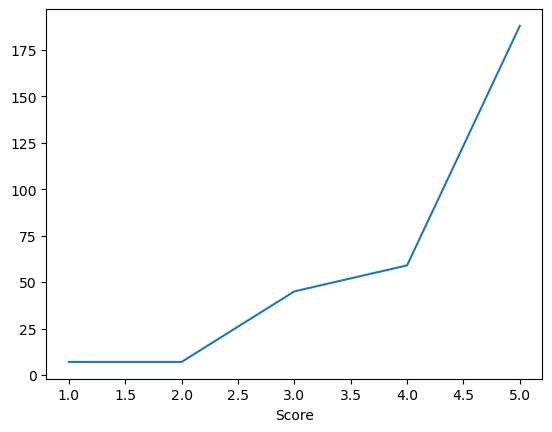

In [96]:
freq_viewer['Score'].value_counts().plot()

<Axes: xlabel='Score'>

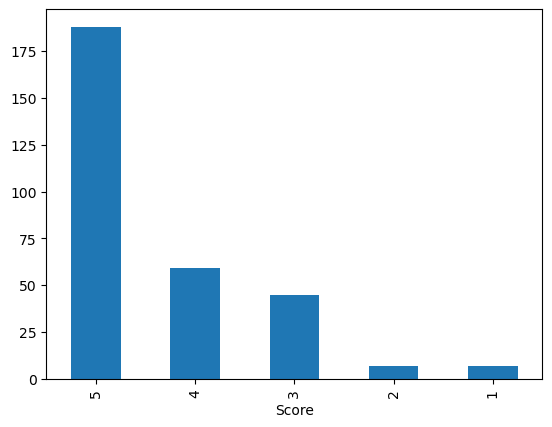

In [98]:
freq_viewer['Score'].value_counts().plot(kind='bar')

In [102]:
freq_viewer['Score'].value_counts()/len(freq_viewer)*100

Score
5    61.437908
4    19.281046
3    14.705882
2     2.287582
1     2.287582
Name: count, dtype: float64

In [104]:
Not_freq_viewer['Score'].value_counts()/len(Not_freq_viewer)*100

Score
5    39.265087
1    25.098185
3    12.398285
4    12.017096
2    11.221347
Name: count, dtype: float64